# Deep Learning Frameworks

## Comparison

<img src="imgs/frameworks.png">

more details at http://www.slideshare.net/xavigiro/deep-learning-for-computer-vision-software-frameworks-upc-2016

## We start from theano

Theano features:

- integration with NumPy
- effective analytical computation of gradient (can automatically build expressions to compute gradient)
- fast and stable optimization (can recognize numerical inaccurate expressions and compute them using more stable algorithms)
- transparent usage of GPU
- dynamic C++ code generation


<small>more details at http://theano.readthedocs.io/en/latest/</small>

<center><img  src="imgs/import_theano.jpg"/></center>
<small>courtesy of http://www.marekrei.com/blog/theano-tutorial/</small>

## Installation

#### prerequisites
- If you want fast compiled code (recommended), make sure you have g++ (Windows/Linux) or Clang (OS X) installed.
- miniconda
- `conda install numpy scipy mkl <nose> <sphinx> <pydot-ng>`
- see link below for GPU installation details

#### theano itself
- ```pip install Theano[test, doc]```
- install `libgpuarray`, http://bit.ly/2eeynjd


<small>more details http://theano.readthedocs.io/en/latest/install_macos.html</small>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np
from __future__ import print_function
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,roc_curve
from sklearn.metrics import roc_auc_score

/home/igor/anaconda3/envs/everware/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Import theano and naming conventions

In [2]:
import theano.tensor as T
import theano

## Symbolic expessions for tensors
Theano’s strength is in expressing symbolic calculations involving tensors. There are many types of symbolic expressions for tensors:

* scalar
* vector
* matrix
* tensor
* ...

## Exercise: warming up
* Implement a function that takes 1 argument - N and computes the sum of squares of numbers from 0 to N
* An array of numbers 0 to N returned by `np.arange(N)`

function definition should look like

```(python)
def sum_squares(N):
    array = ...
    sum = ...
    return sum
```

In [3]:
def sum_squares(N):
    return np.sum(np.arange(N)**2)

In [4]:
# implement function sum_squares(N) here:

In [5]:
%%time
sum_squares(10**8)

CPU times: user 368 ms, sys: 64 ms, total: 432 ms
Wall time: 432 ms


662921401752298880

## theano teaser

Doing the very same thing

In [6]:
import theano
import theano.tensor as T

In [69]:
#I gonna be function parameter
N = T.scalar("a dimension",dtype='int32')


#i am a recipe on how to produce sum of squares of arange of N given N
result = N + 2

#Compiling the recipe of computing "result" given N
sum_function = theano.function(inputs = [N],outputs=result)

In [8]:
%%time
sum_function(10**8)

CPU times: user 296 ms, sys: 36 ms, total: 332 ms
Wall time: 329 ms


array(662921401752298880)

## How does it work?

__if you're currently in classroom, chances are I am explaining this text wall right now__

* 1 You define inputs of your future function;
* 2 You write a recipe for some transformation of inputs;
* 3 You compile it;
* You have just got a function!
* The gobbledegooky version: _you define a function as symbolic computation graph_.

* There are two main kinds of entities: "Inputs" and "Transformations"
* Both can be numbers, vectors, matrices, tensors, etc.
* Both can be integers, floats of booleans (uint8) of various size.

* An input is a placeholder for function parameters.
 * N from example above

* Transformations are the recipes for computing something given inputs and transformation
 * (T.arange(N)^2).sum() are 3 sequential transformations of N
 * Mimics all functions of numpy vector syntax
 * You can almost always go with replacing "np.function" with "T.function" aka "theano.tensor.function"
   * np.mean -> T.mean
   * np.arange -> T.arange
   * np.cumsum -> T.cumsum
   * and so on.
   * builtin operations also work that way
   * np.arange(10).mean() -> T.arange(10).mean()
   * Once upon a blue moon the functions have different names or locations (e.g. T.extra_ops)
     * Ask us or google it
 
Still confused? We gonna fix that.

In [9]:
#Inputs
example_input_integer = T.scalar("scalar input",dtype='float32')

example_input_tensor = T.tensor4("four dimensional tensor input") # don't be afraid, we won't use it

input_vector = T.vector("", dtype='int32') # vector of integers

In [10]:
#Transformations

#transofrmation: elementwise multiplication
double_the_vector = input_vector*2

#elementwise cosine
elementwise_cosine = T.cos(input_vector)

#difference between squared vector and vector itself
vector_squares = input_vector**2 - input_vector


## Exercise: define two float32 vectors

```python
my_vector = ...
my_vector2 = ...
```

In [11]:
#Practice time:
#create two vectors of size float32
my_vector = T.vector('float32')
my_vector2 = T.vector('float32')

print(my_vector, my_vector2)

float32 float32


In [12]:
# put your vector definition here
vec1 = [1,2]
vec2 = [-1,1]

## Exercise: define transformation

it should compute (my_vector)*(my_vector2) / (sin(my_vector) +1)
```python
my_transformation = 
```

In [13]:
my_transformation = my_vector * my_vector2 / (T.sin(my_vector) + 1)

In [14]:
#Write a transformation:

function = theano.function(inputs = [my_vector, my_vector2],outputs=my_transformation)

In [15]:
print (my_transformation)
#it's okay it aint a number

Elemwise{true_div,no_inplace}.0


## Exercise: compiling
* So far we were using "symbolic" variables and transformations
 * Defining the recipe for computation, but not computing anything
* To use the recipe, one should compile it

```python
my_function = ...
```

In [16]:
inputs = [my_vector, my_vector2]
outputs = [my_transformation]

# The next lines compile a function that takes two vectors and computes your transformation
my_function = theano.function(
    inputs,outputs,
    allow_input_downcast=True #automatic type casting for input parameters (e.g. float64 -> float32)
 )

In [17]:
# define compiled function here
my_function(vec1,vec2)

[array([-0.54304413,  1.04750573])]

In [18]:
#using function with, lists:
print ("using python lists:")
print (my_function([1,2,3],[4,5,6]))
print

#Or using numpy arrays:
#btw, that 'float' dtype is casted to secong parameter dtype which is float32
print ("using numpy arrays:")
print (my_function(np.arange(10),
                  np.linspace(5,6,10,dtype='float')))


using python lists:
[array([  2.1721765 ,   5.23752866,  15.77397633])]
using numpy arrays:
[array([   0.        ,    2.77555886,    5.47030772,   14.0213123 ,
         89.54770241,  676.25775443,   47.18391794,   24.40843183,
         23.68156223,   38.24041719])]


## Debugging
* Compilation can take a while for big functions
* To avoid waiting, one can evaluate transformations without compiling
* Without compilation, the code runs slower, so consider reducing input size


In [19]:
#a dictionary of inputs
my_function_inputs = {
    my_vector:[1,2,3],
    my_vector2:[4,5,6]
}

# evaluate my_transformation
# has to match with compiled function output
print (my_transformation.eval(my_function_inputs))


# can compute transformations on the fly
print ("add 2 vectors", (my_vector + my_vector2).eval(my_function_inputs))

#!WARNING! if your transformation only depends on some inputs,
#do not provide the rest of them
print ("vector's shape:", my_vector.shape.eval({
        my_vector:[1,2,3]
    }))


[  2.1721765    5.23752866  15.77397633]
add 2 vectors [ 5.  7.  9.]
vector's shape: [3]


* When debugging, one would generally want to reduce the computation complexity. For example, if you are about to feed neural network with 1000 samples batch, consider taking first 2.
* If you really want to debug graph of high computation complexity, you could just as well compile it (e.g. with optimizer='fast_compile')

### `theano.printing.pprint()`
Theano provides the functions `theano.printing.pprint()` and `theano.printing.debugprint()` to print a graph to the terminal before or after compilation. `pprint()` is more compact and math-like, `debugprint()` is more verbose. Theano also provides `pydotprint()` that creates an image of the function. 

In [20]:
theano.pprint(my_vector)

'float32'

In [21]:
theano.printing.debugprint(my_function)

Elemwise{Composite{((i0 * i1) / (i2 + sin(i0)))}} [id A] ''   0
 |float32 [id B]
 |float32 [id C]
 |TensorConstant{(1,) of 1.0} [id D]


The output file is available at graph.png


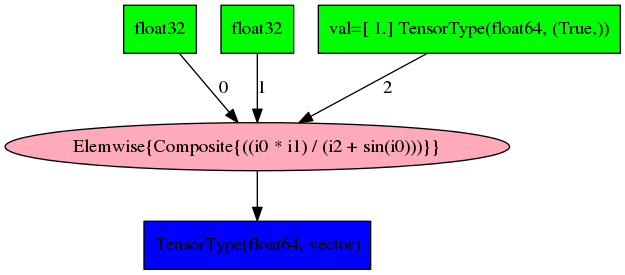

In [22]:
from theano.printing import pydotprint
import pydot
theano.printing.pydotprint(my_function, outfile="graph.png", var_with_name_simple=True)
Image('./graph.png')

## Exercises

In [64]:
# Let's define two vector and two scalar placeholders
x = T.vector('float32') 
y = T.vector('float32')
alpha = T.scalar("a dimension", dtype='int32')
beta = T.scalar("a dimension", dtype='int32')

# define values for each placeholder 
x_val = np.arange(10)
y_val = np.arange(10)
alpha_val = 0.1
beta_val = 0.3

* compute $z = (x_1 + y_1^2, x_2 + y_2^2, ...)^T$: define theano function and evaluate it

In [40]:
my_transformation = x +y * y
my_function = theano.function(inputs=[x, y],outputs=[my_transformation])
print(my_function([1,2],[0,3]))



[array([  1.,  11.])]


* compute $||\textbf{x}||$

In [61]:

my_transformation = T.sqrt(T.sum(x*x))
my_function = theano.function(inputs=[x],outputs=[my_transformation])
print(my_function([3,4]))


[array(5.0)]


* compute $(\textbf{x} \cdot \alpha \textbf{y} + \beta \textbf{x} \cdot \textbf{y})^2$

In [73]:

my_transformation = T.sqr(x * alpha * y + beta* x * y)
my_function = theano.function(inputs=[x, y, alpha, beta],outputs=[my_transformation],allow_input_downcast=True)
print(my_function([0,1], [1,2], 1, 2))

[array([  0.,  36.])]


# Shared variables

* The inputs and transformations only exist when function is called

* Shared variables always stay in memory like global variables
 * Shared variables can be included into a symbolic graph
 * They can be set and evaluated using special methods
   * but they can't change value arbitrarily during symbolic graph computation
   * we'll cover that later;
 
 
* Hint: such variables are a perfect place to store network parameters
 * e.g. weights or some metadata

In [24]:
#creating shared variable
shared_vector = theano.shared(np.ones(10,dtype='float64'))

In [25]:

#evaluating shared variable (outside symbolicd graph)
print ("initial value",shared_vector.get_value())

# within symbolic graph you use them just as any other inout or transformation, not "get value" needed

initial value [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [26]:
#setting new value
shared_vector.set_value( np.arange(5) )

#getting that new value
print ("new value", shared_vector.get_value())

#Note that the vector changed shape
#This is entirely allowed... unless your graph is hard-wired to work with some fixed shape

new value [ 0.  1.  2.  3.  4.]


## Exercise: define another shared vector and assign it to `shared_vector`

```python
shared_vector2 = ...
```

In [27]:
shared_vector2 = theano.shared(shared_vector.eval())

In [28]:
# put your code here

In [29]:
print (shared_vector2.eval())

[ 0.  1.  2.  3.  4.]


## Almost done - Updates

* updates are a way of changing shared variables at after function call.

* technically it's a dictionary {shared_variable : a recipe for new value} which is has to be provided when function is compiled

That's how it works:

In [30]:
# Multiply shared vector by a number and save the product back into shared vector
input_scalar = T.scalar()
scalar_times_shared = input_scalar * shared_vector

inputs = [input_scalar]
outputs = [scalar_times_shared] #return vector times scalar

my_updates = [
    (shared_vector, scalar_times_shared) #and write this same result bach into shared_vector
]

compute_and_save = theano.function(inputs, outputs, updates=my_updates)

In [31]:
shared_vector.set_value(np.arange(5))

#initial shared_vector
print ("initial shared value:" ,shared_vector.get_value())

# evaluating the function (shared_vector will be changed)
print ("compute_and_save(2) returns",compute_and_save(2))

#evaluate new shared_vector_1
print ("new shared value:" ,shared_vector.get_value())



initial shared value: [ 0.  1.  2.  3.  4.]
compute_and_save(2) returns [array([ 0.,  2.,  4.,  6.,  8.])]
new shared value: [ 0.  2.  4.  6.  8.]


## Gradient, T.grad - why theano matters
* Theano can compute derivatives and gradients automatically
* Derivatives are computed symbolically, not numerically

Limitations:
* You can only compute a gradient of a __scalar__ transformation over one or several scalar or vector (or tensor) transformations or inputs.
* A transformation has to have float32 or float64 dtype throughout the whole computation graph
 * derivative over an integer has no mathematical sense


### 1D gradient (derivative)

In [32]:
x = T.scalar(name='x') 
function1d = x ** 2 + T.log(x)
function1d_derivative = T.grad(function1d, x)

In [33]:
# let's compile it
compiled_derivative = theano.function([x], outputs=[function1d_derivative])
compiled_f = theano.function([x], function1d)

In [34]:
# optimizations were done during compilation
theano.printing.debugprint(compiled_derivative)

Elemwise{Composite{((i0 * i1) + inv(i1))}} [id A] ''   0
 |TensorConstant{2.0} [id B]
 |x [id C]


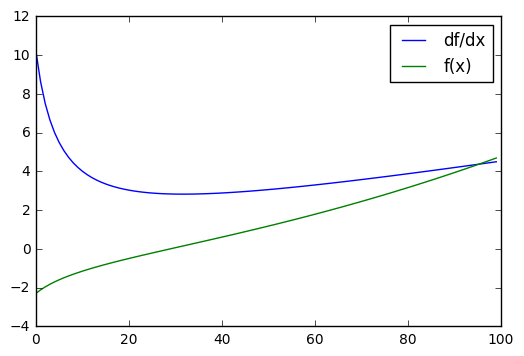

In [35]:
xarray = np.linspace(0.1, 2, 100)
plt.plot([compiled_derivative(point) for point in xarray], label="df/dx")
plt.plot([compiled_f(point) for point in xarray], label="f(x)")
_ = plt.legend()

Or you can compute gradient wrt set of variables

In [36]:
b = theano.shared(6.0)
x = T.scalar(dtype='float64')
function1d = x ** 2 + T.log(x) + b
function1d_derivative = T.grad(function1d, [x, b])
compiled_derivative = theano.function([x], function1d_derivative)
compiled_f = theano.function([x], function1d)



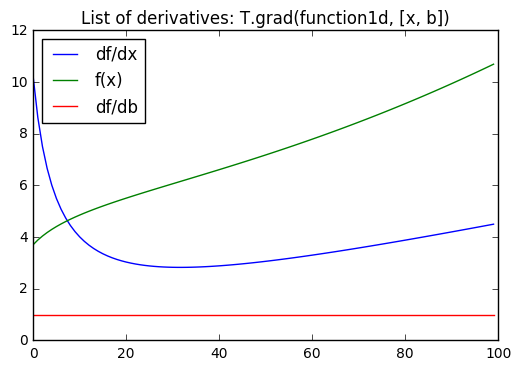

In [37]:
xarray = np.linspace(0.1, 2, 100)
plt.plot([compiled_derivative(point)[0] for point in xarray], label="df/dx")
plt.plot([compiled_f(point) for point in xarray], label="f(x)")
plt.plot([compiled_derivative(point)[1] for point in xarray], label="df/db")

plt.title("List of derivatives: T.grad(function1d, [x, b])")
_ = plt.legend(loc="upper left")

### NDimensional gradient

In [38]:
x = T.vector(name='x') 
function = T.sum(x * x)
function_gradient = T.grad(function, x)

In [39]:
compiled_gradient = theano.function([x], function_gradient)

In [40]:
compiled_gradient([1, 2, 4, 0])

array([ 2.,  4.,  8.,  0.])

In [41]:
theano.printing.debugprint(compiled_gradient)

Elemwise{add,no_inplace} [id A] ''   0
 |x [id B]
 |x [id B]


## Why that rocks

In [42]:
my_vector = T.vector('float64')
my_scalar = T.scalar('float64')

#Compute the gradient of the next weird function over my_scalar and my_vector
#warning! Trying to understand the meaning of that function may result in permanent brain damage

weird_psychotic_function = ((my_vector+my_scalar)**(1+T.var(my_vector)) +1./T.arcsinh(my_scalar)).mean()/(my_scalar**2 +1) + 0.01*T.sin(2*my_scalar**1.5)*(T.sum(my_vector)* my_scalar**2)*T.exp((my_scalar-4)**2)/(1+T.exp((my_scalar-4)**2))*(1.-(T.exp(-(my_scalar-4)**2))/(1+T.exp(-(my_scalar-4)**2)))**2

## Define gradient of the function

```python
der_by_scalar, der_by_vector = ...
```

In [43]:
der_by_scalar, der_by_vector = T.grad(weird_psychotic_function, [my_scalar, my_vector])

In [44]:
# define gradient by scalar and by vector here

In [45]:
compute_weird_function = theano.function([my_scalar,my_vector],weird_psychotic_function)
compute_der_by_scalar = theano.function([my_scalar,my_vector],der_by_scalar)

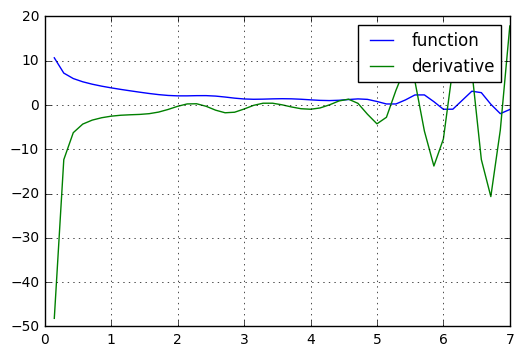

In [46]:
#Plotting your derivative
vector_0 = [1,2,3]

scalar_space = np.linspace(0,7)

y = [compute_weird_function(x,vector_0) for x in scalar_space]
plt.plot(scalar_space,y,label='function')
y_der_by_scalar = [compute_der_by_scalar(x,vector_0) for x in scalar_space]
plt.plot(scalar_space,y_der_by_scalar,label='derivative')
plt.grid();plt.legend()


## Matrix

#### Compute $||A\textbf{x}||^2$:

In [47]:
x = T.vector('x')
A = T.matrix('A')
z = A.dot(x)
normAx = theano.function([x, A], z.dot(z))
normAx([0, 2], [[1, 1], [1, 1]])

array(8.0)

## Exercises

* compile a function which takes an array $x$ with three elements and computes $x_0^3 + \sin{x_1}*\cos{x_2}$. Check it by computing at any point

* compute gradient for previous function w.r.t. x

* compute gradient for $||A\textbf{x}|| + \alpha * ||\textbf{x}||$ 

## Logistic regression 

In [114]:
from sklearn.cross_validation import train_test_split 
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_digits

## Logistic regression description:

### $p_i = \sigma(\sum_k X_{ik} w_k + b_0)$

### $\text{logLikelihood}=\sum_i y_i \log{p_i} + \sum_i (1-y_i)\log{(1 - p_i)}\qquad y \in \{0, 1\}$

### $loss = -\text{logLikelihood}, \qquad loss \to \min$



## Exercise 

Let's build logistic regression to discriminate 0 from 1 on MNIST dataset

Write loss function and its gradient using theano (create compiled expressions).

Implement the regular logistic regression training algorithm (weights -= 0.01 * grad)

Tips:
* Weights fit in as a shared variable
* X and y are inputs
* Compile 2 functions:
 * train_function(X,y) - returns error and computes weights' new values __(through updates)__
 * predict_fun(X) - just computes probabilities ("y") given data
* output labels - {0, 1}
* while computing log() beware of log(0) (by adding very small epsilon value)
* You can **use** `T.nnet.sigmoid`

In [185]:
import pandas as pd
import numpy as np
data = pd.read_csv("data_bank-marketing", skiprows = 97, header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,1


In [186]:
y = data[16]
y = np.array(y)
y = y -  1
del data[16]
X = data.copy()

In [187]:
del X[9]
del X[10]
cat_columns = X.select_dtypes(include=['object']).columns
cont_columns = X.select_dtypes(exclude=['object']).columns
data_cat = X.select_dtypes(include=['object'])

unique_threshold = 20
for column in cat_columns:
    if len(X[column].unique()) > unique_threshold:
        X = X.drop(column, 1)
        continue
    dummies = pd.get_dummies(X[column])
    #print(column,dummies.columns)
    dummies.columns = [str(column) + '_' + d_c for d_c in dummies.columns]
    X[dummies.columns] = dummies
    X = X.drop(column, 1)
    
print(X.shape)
X.head()

(4521, 38)


,0,5,11,12,13,14,1_admin.,1_blue-collar,1_entrepreneur,1_housemaid,...,6_yes,7_no,7_yes,8_cellular,8_telephone,8_unknown,15_failure,15_other,15_success,15_unknown
0,30,1787,79,1,-1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,33,4789,220,1,339,4,0,0,0,0,...,1,0,1,1,0,0,1,0,0,0
2,35,1350,185,1,330,1,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
3,30,1476,199,4,-1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,59,0,226,1,-1,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,1


## Define variables for logistic regression

```python
shared_weights = # shared vector of weights, dimension = number of input variables (features)
shared_bias = # shared bias scalar
input_X = # matrix of digits vs features
input_y = # vector of labels
```

In [188]:
# inputs and shared variable, try initializing with 0s, 1s and np.random.rand
shared_weights = theano.shared(np.zeros(X.shape[1]))
shared_bias = theano.shared(0.0)
input_X = T.matrix('float64')
input_y = T.vector('float64')

In [189]:
# put your code here


Let's define expressions for predicted values and loss function

```python
predicted_y = # prediction of p_i
eps =  # very small value, to avoid log(0)
log_likelihood = # logistic likelihood (use eps to avoid log(0))
loss = # -log_likelihood
```

In [190]:
predicted_y = T.nnet.sigmoid(input_X.dot(shared_weights) + shared_bias)
eps =  1e-7
log_likelihood = T.sum(T.log(predicted_y + eps) * input_y) + T.sum((1 - input_y) * T.log(1 - predicted_y + eps))
loss = -log_likelihood

In [191]:
# put your code here

Define gradient and update of shared weights 

```python
der_weights, der_bias = # write gradient wrt shared_weights, shared_bias

shared_updates = [
    ... # update weights and bias
]
```

In [192]:
der_weights, der_bias = T.grad(loss, [shared_weights, shared_bias])

alpha = 0.01
shared_updates = [
    (shared_bias, shared_bias - alpha * der_bias ),
    (shared_weights, shared_weights - alpha * der_weights)
]

In [193]:
# put your code here

Now we have expessions for loss and its gradient and we need to use some optimization method

```
predict_function = #<compile function that takes X and computes probabilities of y>
train_function = #<compile function that takes X and y, returns log loss and updates weights>
```

In [194]:
predict_function = theano.function([input_X], predicted_y)
train_function = theano.function([input_X, input_y], loss, updates=shared_updates, allow_input_downcast=True)

In [195]:
#put your code here

In [196]:
X_train,X_test,y_train,y_test = train_test_split(X,y)


In [197]:
print ("Weights: ", shared_weights.eval(), "\nBias: ", shared_bias.eval())
print ("Predictions:", predict_function(X_test)[:20])

Weights:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.] 
Bias:  0.0
Predictions: [ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5
  0.5  0.5  0.5  0.5  0.5]


In [198]:
assert len(predict_function(X_test)[:20]) == 20

loss at iter 0:5726.1325
train auc: 0.490285652863
test auc: 0.483715640728
loss at iter 1:2609623494.5723
train auc: 0.490285652863
test auc: 0.483715640728
loss at iter 2:2609623494.5723
train auc: 0.490285652863
test auc: 0.483715640728
loss at iter 3:2609623494.5723
train auc: 0.490285652863
test auc: 0.483715640728
loss at iter 4:2609623494.5723
train auc: 0.490285652863
test auc: 0.483715640728


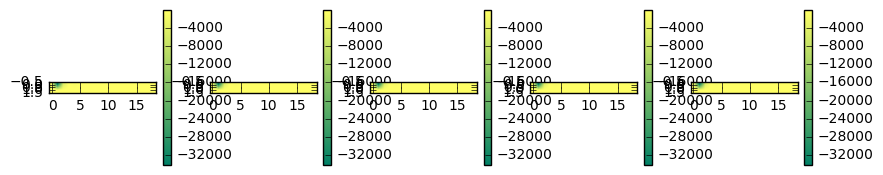

In [199]:
shared_weights.set_value(0.001*np.random.rand(shared_weights.eval().shape[0]))
shared_bias.set_value(0.01*np.random.rand())

plt.figure(figsize=(10,2))
for i in range(5):
    loss_i = train_function(X_train,y_train)
    print ("loss at iter %i:%.4f"%(i, loss_i))
    print ("train auc:",roc_auc_score(y_train, predict_function(X_train)))
    print ("test auc:",roc_auc_score(y_test, predict_function(X_test)))
    plt.subplot(1, 5, i+1)
    plt.imshow(shared_weights.eval().reshape(2,-1), cmap=plt.cm.summer)
    plt.colorbar();

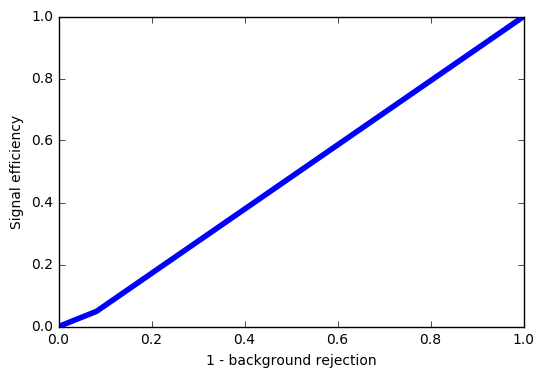

In [200]:
# It's time to plot ROC curve
y_pred = predict_function(X_test)

plt.plot(*roc_curve(y_test,y_pred)[:2], lw=4)
plt.xlabel("1 - background rejection")
plt.ylabel("Signal efficiency")

## Quiz

1. Why image of weights in 8x8 bitmap reminds shape of `0`?
2. Why test AUC sometimes higher than train AUC?
3. How quality depends on gradient coefficients?